In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn import metrics
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.gridspec as gridspec
from sklearn.ensemble import BaggingClassifier

# Reading the dataset 

In [2]:
df=pd.read_excel('kc-house-data-mini.xlsx')

#  Summarizing important observations from the data set 

In [3]:
pd.options.display.max_columns=None 
pd.options.display.max_rows=None 
df


id             date    price  bedrooms  bathrooms  sqft_living  \
0     2068000270  20140805T000000  1400000         5       3.00         3850   
1     7732500700  20141126T000000   832500         4       2.50         3450   
2     7851990240  20140717T000000   771150         4       3.50         3950   
3     3423049269  20140513T000000   225000         4       1.50         1950   
4     7852150200  20140923T000000   389950         3       2.50         1700   
5     7853230270  20140804T000000   435000         3       2.50         2370   
6     1965200075  20150316T000000   845000         3       1.75         1600   
7     1959700445  20140725T000000  1300000         4       1.75         4060   
8     1250200765  20140714T000000   350000         3       2.25         1322   
9     3275300270  20140708T000000   250000         3       1.75         1140   
10    7548300751  20150430T000000   370000         2       1.50         1280   
11    9526600260  20140729T000000   750000         4       2.50         3080   
12    2880100240  20140825T000000   439950         2       1.75         1210   
13    5253300320  20141103T000000   395000         4       1.75         1950   
14    2291400566  20140807T000000   375000         4       1.00         1450   
15     103400160  20140515T000000   263000         3       2.25         1590   
16    1951600240  20141208T000000   185000         3       1.00         1240   
17     224069129  20150225T000000   500000         3       1.00         1440   
18    5608000860  20140926T000000   920000         4       2.50         3470   
19     424069271  20141024T000000   936000         7       3.75         5100   
20    8964800390  20140508T000000  1500000         3       1.75         2430   
21    7533800885  20141027T000000  1100000         3       2.25         2420   
22    2312400200  20150102T000000   247000         3       2.50         1510   
23    3226049267  20150425T000000   289500         3       1.00         1200   
24    7852130640  20140602T000000   432500         3       2.50         2240   
25    9530101535  20150327T000000   680000         3       1.75         1870   
26    6822100030  20140528T000000   589000         3       1.00         1110   
27    1090000036  20141223T000000   756450         4       2.00         3210   
28    6619910260  20150407T000000   536650         3       1.75         2090   
29     342000036  20140702T000000   540000         3       2.25         1320   
30    3448002267  20150428T000000   385000         3       1.75         1340   
31    7974200765  20140902T000000   485000         3       1.00         1020   
32    7230400400  20140926T000000   240000         3       2.00         1220   
33    7230400400  20150326T000000   415500         3       2.00         1220   
34    2028700575  20141113T000000   550000         3       2.00         1390   
35    4232400400  20140929T000000  1260000         4       2.00         2970   
36     792500260  20140715T000000   430000         2       2.00         1440   
37    2493200370  20141112T000000   415000         2       1.75         1550   
38     844001052  20150128T000000   365000         4       2.50         1904   
39    7696610240  20141210T000000   257000         4       1.50         1400   
40    3630110370  20140624T000000   420000         3       2.50         2140   
41    1217000270  20140916T000000   338995         3       1.75         1320   
42    9441300030  20150410T000000   615000         3       1.75         2620   
43    2991000160  20141212T000000   312500         4       0.50         2300   
44    6641020160  20140506T000000   513000         4       2.50         2000   
45    2998300075  20150127T000000   857500         4       2.75         2960   
46    5456000570  20141230T000000  1060000         3       2.75         2700   
47    7784400070  20140722T000000   585000         3       1.75         1740   
48    2781250400  20141008T000000   350500         2       2.50         1770   
49    38214002

In [4]:
df.head()

id             date    price  bedrooms  bathrooms  sqft_living  \
0  2068000270  20140805T000000  1400000         5        3.0         3850   
1  7732500700  20141126T000000   832500         4        2.5         3450   
2  7851990240  20140717T000000   771150         4        3.5         3950   
3  3423049269  20140513T000000   225000         4        1.5         1950   
4  7852150200  20140923T000000   389950         3        2.5         1700   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0     14990     1.0           0     0          4      9        2290   
1     35100     2.0           0     0          3     10        3450   
2     12320     2.0           0     0          3     10        3950   
3     12559     1.5           0     0          3      6        1950   
4      6396     2.0           0     0          3      7        1700   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           1560      1964             0    98004  47.6425 -122.218   
1              0      1987             0    98052  47.7302 -122.106   
2              0      2001             0    98065  47.5414 -121.869   
3              0      1939             0    98188  47.4364 -122.282   
4              0      2003             0    98065  47.5333 -121.870   

   sqft_living15  sqft_lot15  
0           3010       15001  
1           3110       35894  
2           3920       11086  
3           1950        9178  
4           1700        4444

# Number of rows and no. of cols & types of variables. 

In [5]:
df.shape

(2001, 21)

There are 2001 rows and 21 columns in the dataset

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 21 columns):
id               2001 non-null int64
date             2001 non-null object
price            2001 non-null int64
bedrooms         2001 non-null int64
bathrooms        2001 non-null float64
sqft_living      2001 non-null int64
sqft_lot         2001 non-null int64
floors           2001 non-null float64
waterfront       2001 non-null int64
view             2001 non-null int64
condition        2001 non-null int64
grade            2001 non-null int64
sqft_above       2001 non-null int64
sqft_basement    2001 non-null int64
yr_built         2001 non-null int64
yr_renovated     2001 non-null int64
zipcode          2001 non-null int64
lat              2001 non-null float64
long             2001 non-null float64
sqft_living15    2001 non-null int64
sqft_lot15       2001 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 328.4+ KB


In [8]:
dfc= [key for key in dict(df.dtypes)
             if dict(df.dtypes)[key] in ['object'] ] #Categorical Variable

dfc

['date']

date is the categorical variable in the data

In [9]:
dfn= [key for key in dict(df.dtypes)
                   if dict(df.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable
dfn


['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

'id','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15' are the numerical variables in the data set

# statistical summary for numerical variables 

In [10]:
df.describe()

id         price     bedrooms    bathrooms   sqft_living  \
count  2.001000e+03  2.001000e+03  2001.000000  2001.000000   2001.000000   
mean   4.590975e+09  5.295997e+05     3.347326     2.036982   2037.556222   
std    2.888947e+09  3.437001e+05     0.905982     0.753579    896.279579   
min    1.120040e+07  8.650000e+04     0.000000     0.500000    470.000000   
25%    2.114700e+09  3.170000e+05     3.000000     1.500000   1410.000000   
50%    3.971701e+09  4.500000e+05     3.000000     2.000000   1890.000000   
75%    7.346600e+09  6.295000e+05     4.000000     2.500000   2470.000000   
max    9.839301e+09  4.208000e+06    10.000000     8.000000  13540.000000   

            sqft_lot       floors   waterfront         view    condition  \
count    2001.000000  2001.000000  2001.000000  2001.000000  2001.000000   
mean    17846.464268     1.423788     0.004998     0.250375     3.449775   
std     47218.111461     0.501312     0.070534     0.807949     0.678676   
min       844.000000     1.000000     0.000000     0.000000     1.000000   
25%      5478.000000     1.000000     0.000000     0.000000     3.000000   
50%      7919.000000     1.000000     0.000000     0.000000     3.000000   
75%     11085.000000     2.000000     0.000000     0.000000     4.000000   
max    715690.000000     3.000000     1.000000     4.000000     5.000000   

             grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  2001.000000  2001.000000    2001.000000  2001.000000   2001.000000   
mean      7.560220  1728.725637     308.830585  1966.890055     84.676162   
std       1.154771   790.018690     459.259858    27.893851    402.134842   
min       4.000000   470.000000       0.000000  1900.000000      0.000000   
25%       7.000000  1160.000000       0.000000  1949.000000      0.000000   
50%       7.000000  1520.000000       0.000000  1969.000000      0.000000   
75%       8.000000  2130.000000     600.000000  1989.000000      0.000000   
max      13.000000  9410.000000    4130.000000  2014.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   2001.000000  2001.000000  2001.000000    2001.000000    2001.000000  
mean   98079.052474    47.561350  -122.215569    1956.869065   15241.781109  
std       53.819947     0.137556     0.141858     673.478504   35224.009024  
min    98001.000000    47.162200  -122.519000     399.000000     980.000000  
25%    98033.000000    47.475800  -122.331000    1460.000000    5325.000000  
50%    98070.000000    47.573400  -122.233000    1820.000000    7800.000000  
75%    98118.000000    47.677500  -122.126000    2300.000000   10236.000000  
max    98199.000000    47.777500  -121.316000    5500.000000  560617.000000

The above is the statistical summary of numerical variables

In [11]:
df['bedrooms'].value_counts()

3     931
4     622
2     258
5     140
1      21
6      20
7       6
10      1
8       1
0       1
Name: bedrooms, dtype: int64

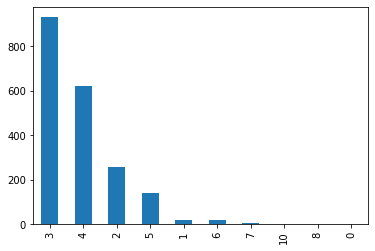

In [12]:
df['bedrooms'].value_counts().plot(kind='Bar')
plt.show()

we can see that 3 bedrooms houses are th highest in city and 4 bedroom houses being the second highest and 0,8,10 being the least

#  Summarizing relationships among variables 

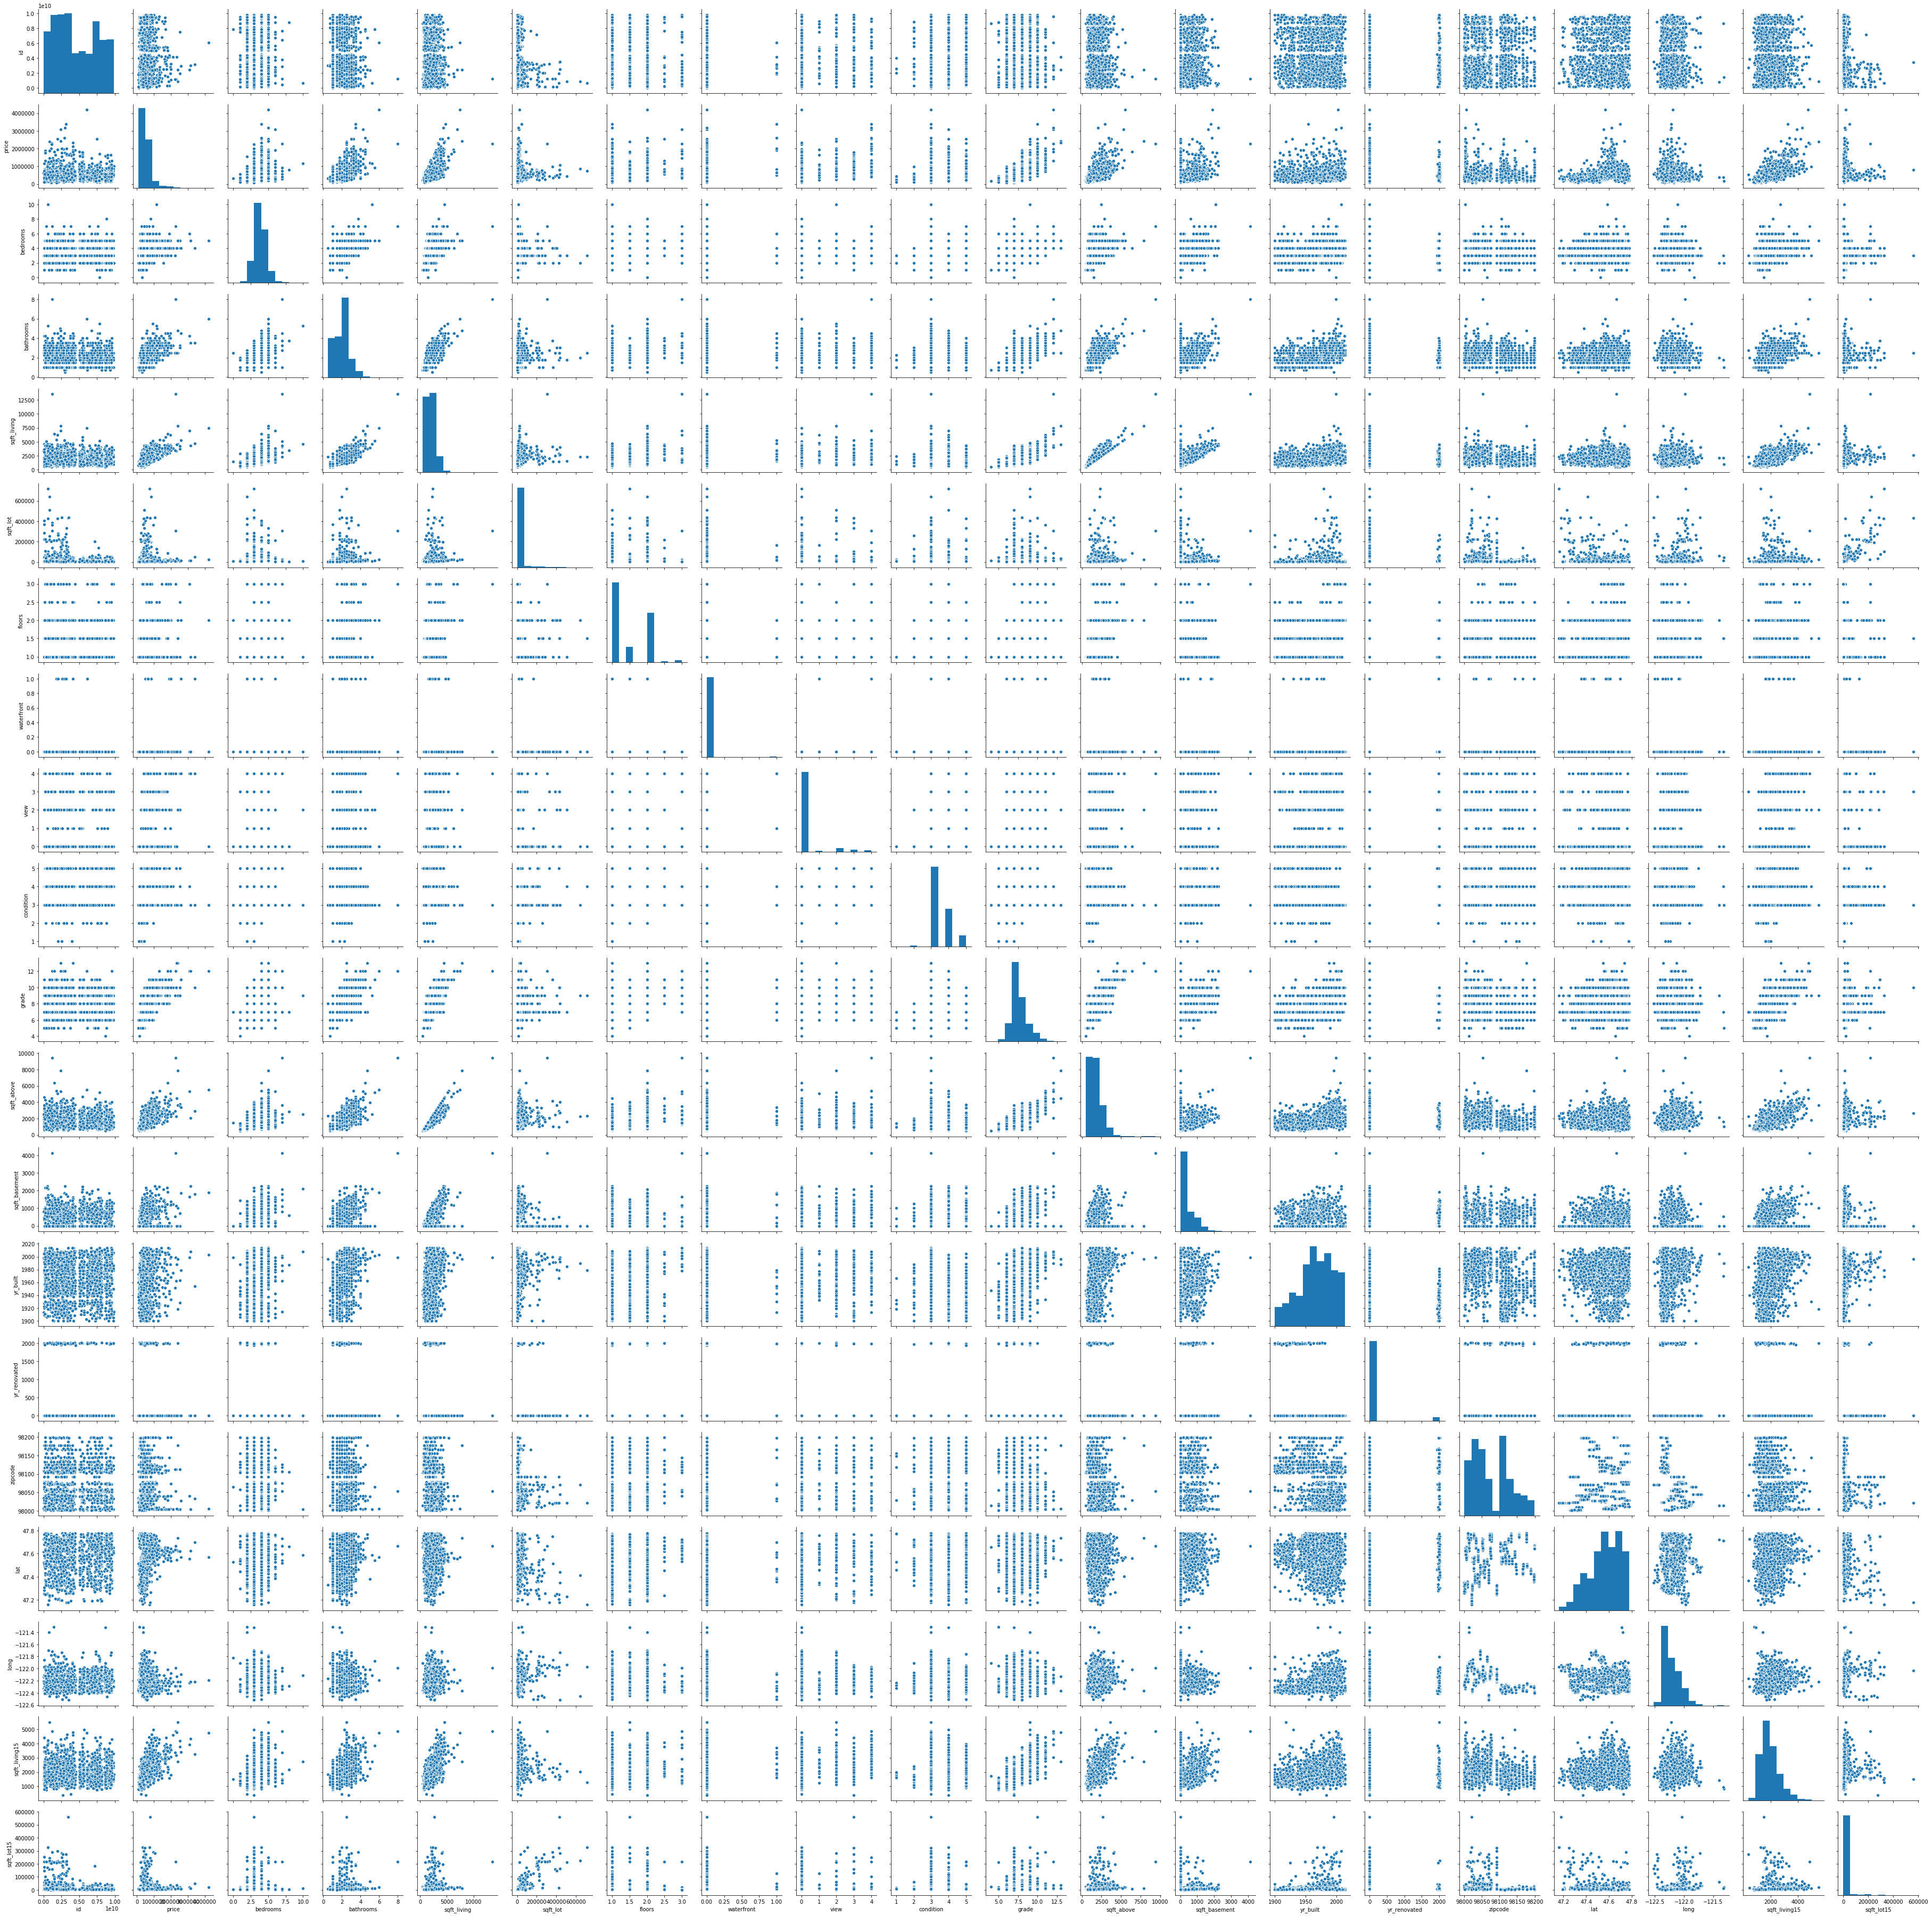

In [13]:
sns.pairplot(df)
plt.show()

The above is the pairplot which tells us the relationships between the variables 

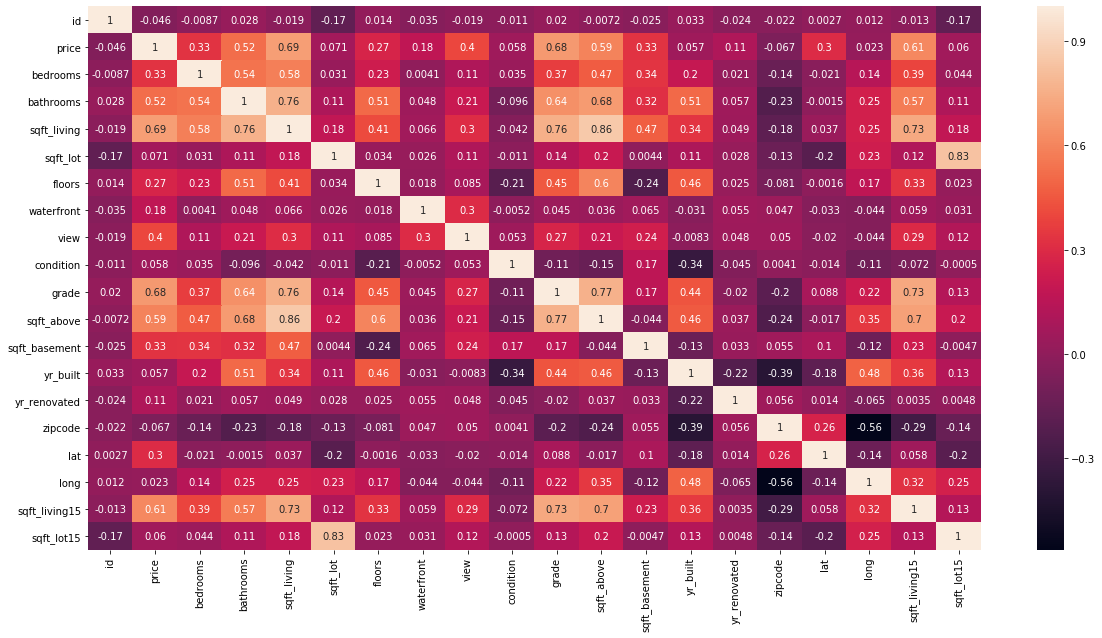

In [14]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor,annot=True)
plt.show()

In [15]:
#Correlation with output variable
cor_target = abs(cor['price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

price            1.000000
bathrooms        0.517750
sqft_living      0.693583
grade            0.675114
sqft_above       0.594260
sqft_living15    0.614607
Name: price, dtype: float64

bathrooms,sqft_living,grade,sqft_above,sqft_living15 are the variables which are highly correlated with the target variable price let us build our base model first and the we will see if we should remove our variables or not

# Checking whether target variable normally distributed

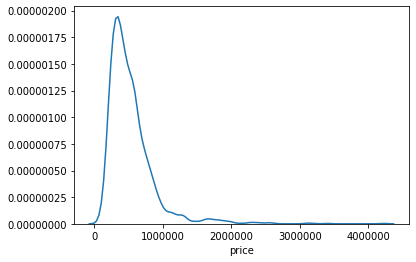

In [16]:
sns.distplot(df['price'],hist=False)
plt.show()

Our target variable is price and we can see that it is not normally distributed it right skewed so let us transform the data and make it normally distributed so that our model performs better

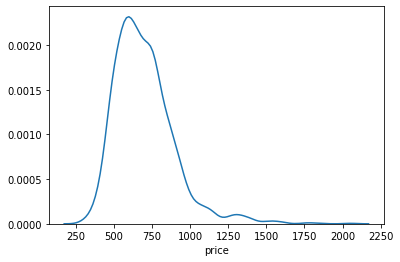

In [17]:
sns.distplot(df['price']**(1/2),hist=False)
plt.show()

After applying log transformation we see that data is slighly normally distributed but not fully so we can use this transformation

In [18]:
df['price']=df['price']**(1/2)

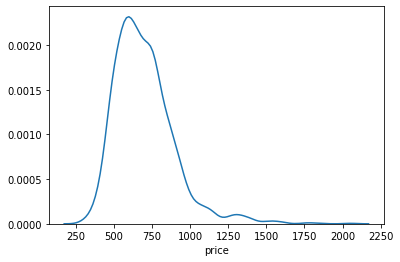

In [19]:
sns.distplot(df['price'],hist=False)
plt.show()

Now the target variable is transformed as we can see from the above graph

# Do variables have missing/null values? 

In [20]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

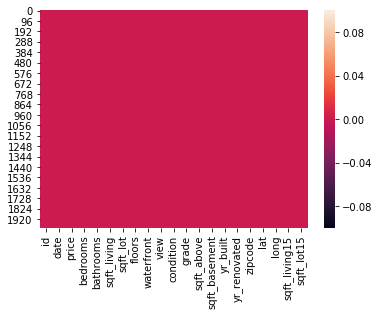

In [21]:
sns.heatmap(df.isnull())
plt.show()

There are no null values/missing values in the data set

#  Does the data have outliers? 

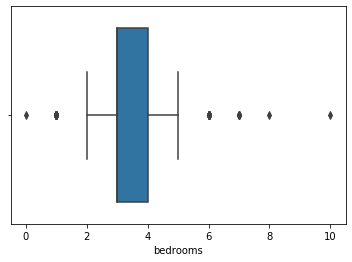

In [23]:
sns.boxplot(df['bedrooms'])
plt.show()

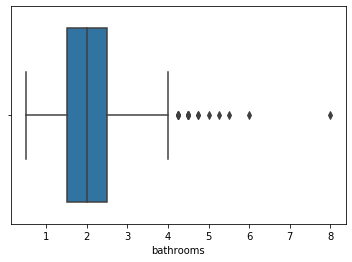

In [26]:
sns.boxplot(df['bathrooms'])
plt.show()

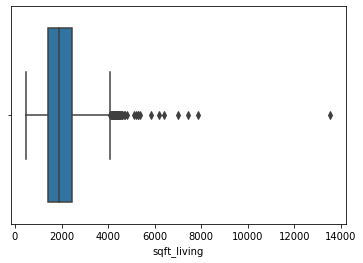

In [27]:
sns.boxplot(df['sqft_living'])
plt.show()

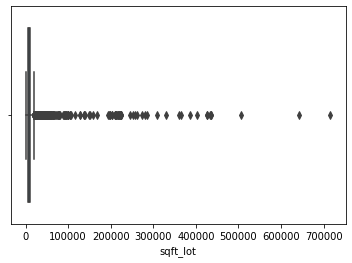

In [30]:
sns.boxplot(df['sqft_lot'])
plt.show()


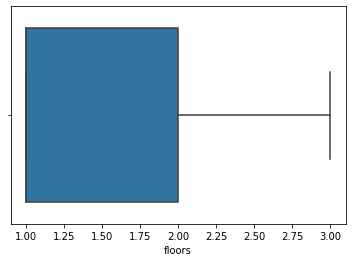

In [31]:
sns.boxplot(df['floors'])
plt.show()

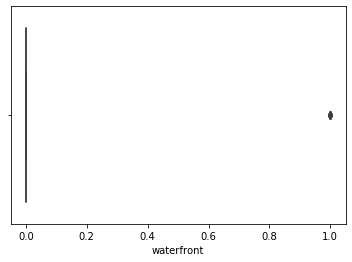

In [32]:
sns.boxplot(df['waterfront'])
plt.show()

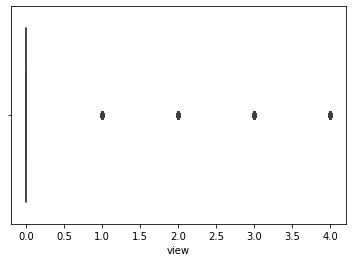

In [33]:
sns.boxplot(df['view'])
plt.show()

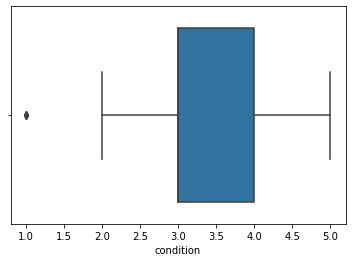

In [34]:
sns.boxplot(df['condition'])
plt.show()

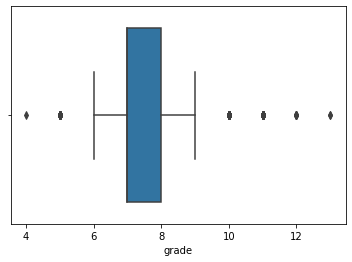

In [35]:
sns.boxplot(df['grade'])
plt.show()

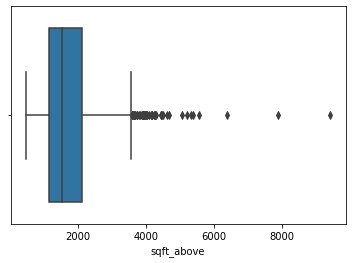

In [36]:
sns.boxplot(df['sqft_above'])
plt.show()

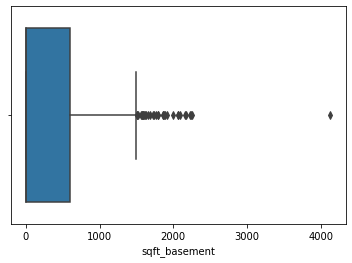

In [37]:
sns.boxplot(df['sqft_basement'])
plt.show()

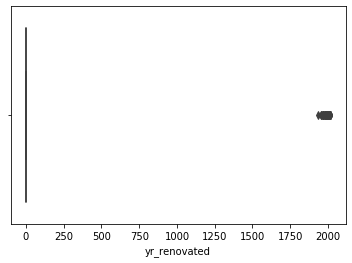

In [38]:
sns.boxplot(df['yr_renovated'])
plt.show()

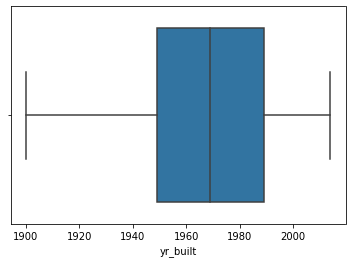

In [39]:
sns.boxplot(df['yr_built'])
plt.show()

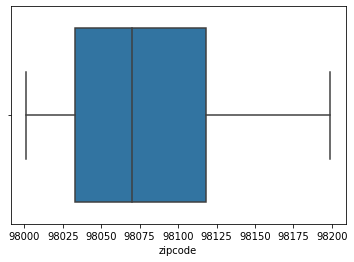

In [42]:
sns.boxplot(df['zipcode'])
plt.show()

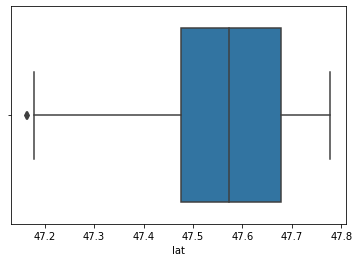

In [43]:
sns.boxplot(df['lat'])
plt.show()

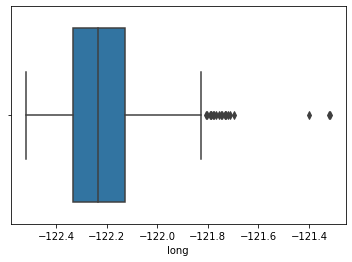

In [44]:
sns.boxplot(df['long'])
plt.show()

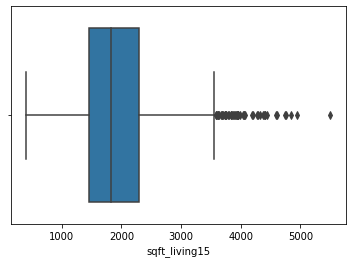

In [45]:
sns.boxplot(df['sqft_living15'])
plt.show()

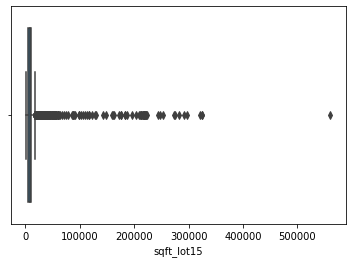

In [46]:
sns.boxplot(df['sqft_lot15'])
plt.show()

So from above we see that there are lot of outliers for almost all the features 

# transformation of features 

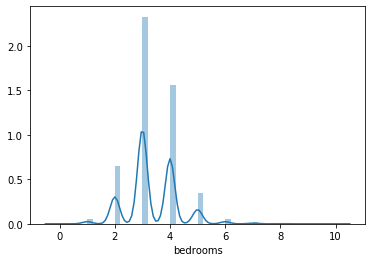

In [58]:
sns.distplot(df['bedrooms'])
plt.show()

this slightly right skewed and let us apply log transform

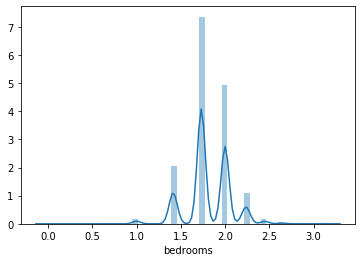

In [59]:
sns.distplot(df['bedrooms']**(1/2))
plt.show()

it is getting skewed to the left so let us leave this variable and not transform it

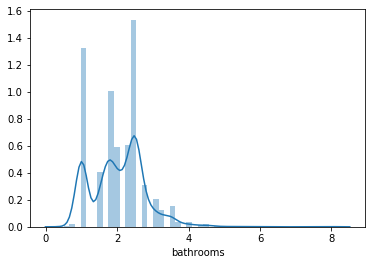

In [60]:
sns.distplot(df['bathrooms'])
plt.show()

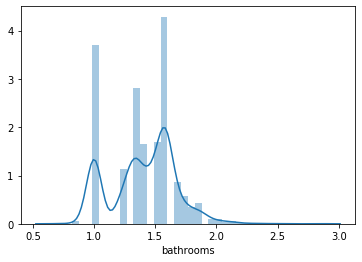

In [61]:
sns.distplot(df['bathrooms']**(1/2))
plt.show()

we are not transforming this feature also as it is also not normally distributed

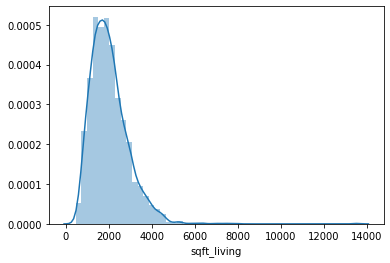

In [62]:
sns.distplot(df['sqft_living'])
plt.show()

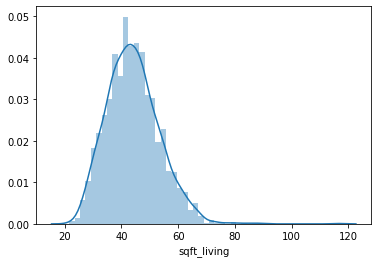

In [63]:
sns.distplot(df['sqft_living']**(1/2))
plt.show()

we are not transforming this feature also as it is also not normally distributed

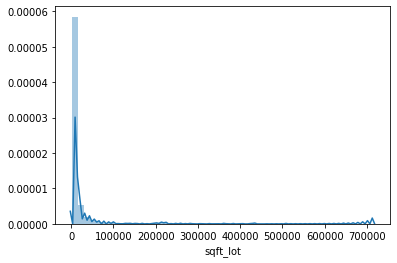

In [64]:
sns.distplot(df['sqft_lot'])
plt.show()

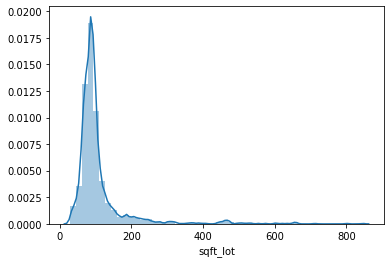

In [66]:
sns.distplot(df['sqft_lot']**(1/2))
plt.show()

no change after transformation so let us procced with the main feature only

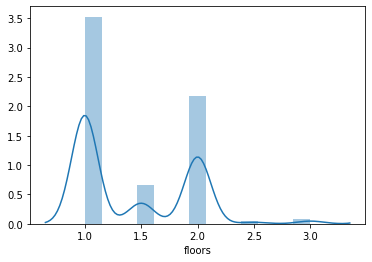

In [67]:
sns.distplot(df['floors'])
plt.show()

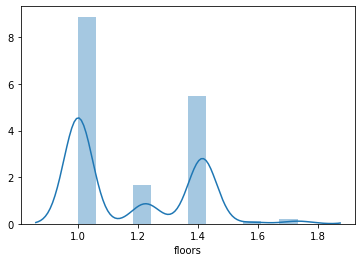

In [69]:
sns.distplot(df['floors']**(1/2))
plt.show()

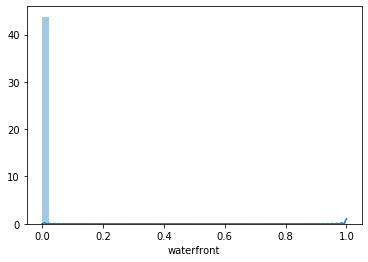

In [71]:
sns.distplot(df['waterfront'])
plt.show()

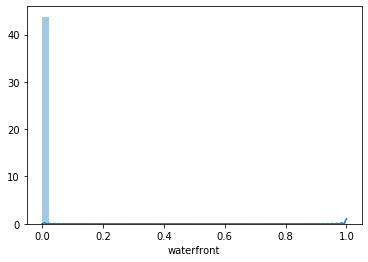

In [72]:
sns.distplot(df['waterfront']**(1/2))
plt.show()

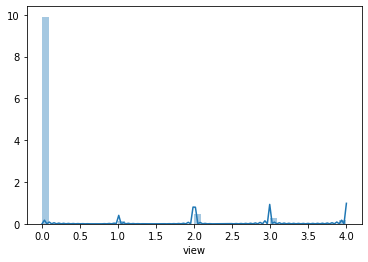

In [73]:
sns.distplot(df['view'])
plt.show()

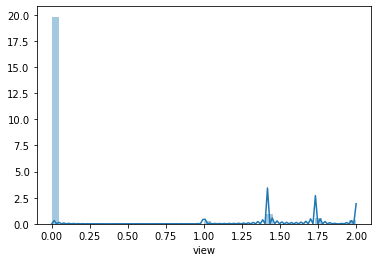

In [74]:
sns.distplot(df['view']**(1/2))
plt.show()

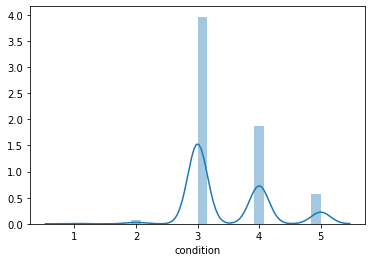

In [75]:
sns.distplot(df['condition'])
plt.show()

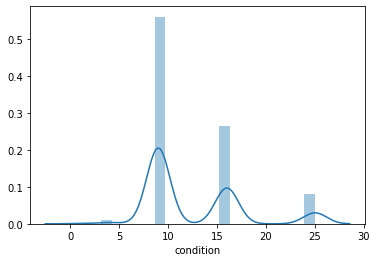

In [78]:
sns.distplot(df['condition']**2)
plt.show()

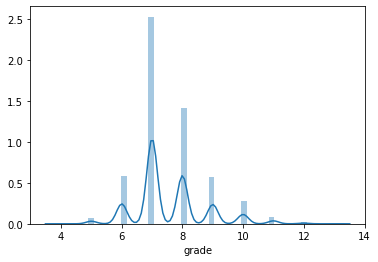

In [79]:
sns.distplot(df['grade'])
plt.show()

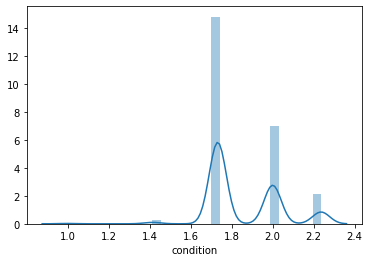

In [81]:
sns.distplot(df['condition']**(1/2))
plt.show()

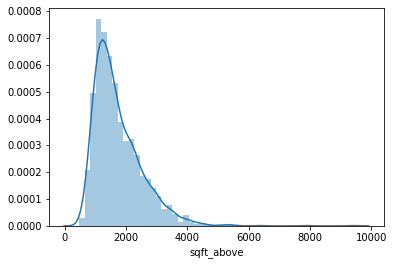

In [82]:
sns.distplot(df['sqft_above'])
plt.show()

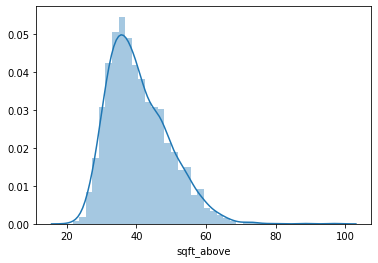

In [84]:
sns.distplot(df['sqft_above']**(1/2))
plt.show()

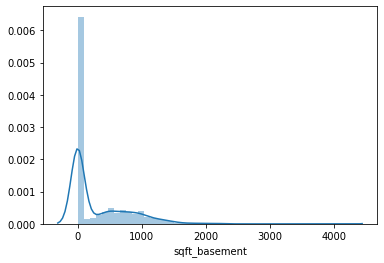

In [85]:
sns.distplot(df['sqft_basement'])
plt.show()

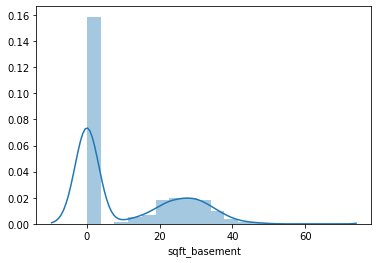

In [87]:
sns.distplot(df['sqft_basement']**(1/2))
plt.show()

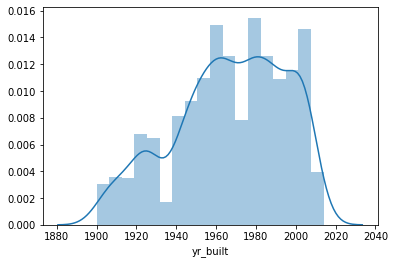

In [88]:
sns.distplot(df['yr_built'])
plt.show()

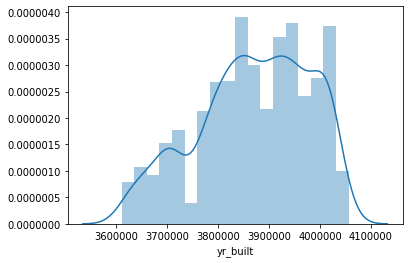

In [89]:
sns.distplot(df['yr_built']**2)
plt.show()

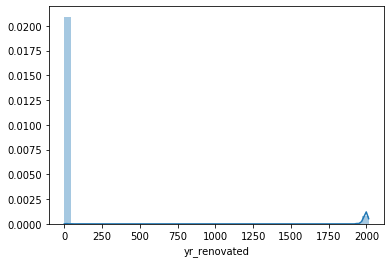

In [91]:
sns.distplot(df['yr_renovated'])
plt.show()

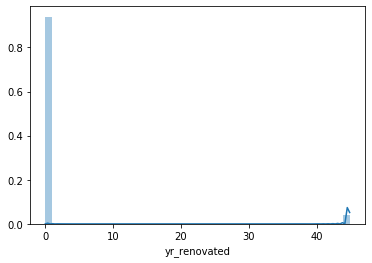

In [92]:
sns.distplot(df['yr_renovated']**(1/2))
plt.show()

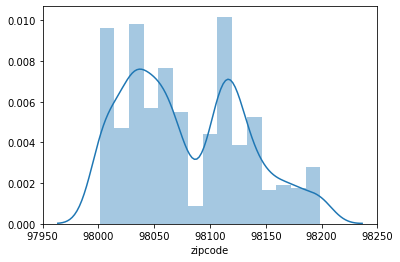

In [93]:
sns.distplot(df['zipcode'])
plt.show()

zip code is normally distributed

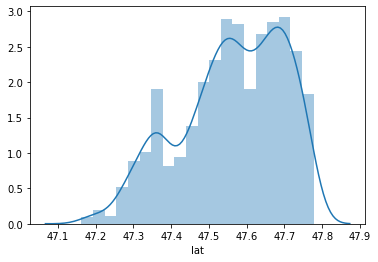

In [94]:
sns.distplot(df['lat'])
plt.show()

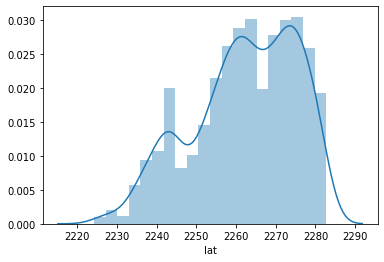

In [96]:
sns.distplot(df['lat']**2)
plt.show()

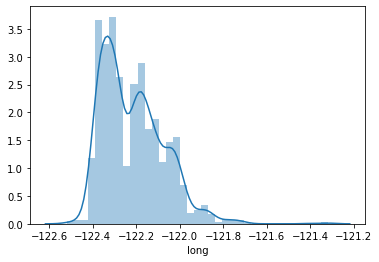

In [97]:
sns.distplot(df['long'])
plt.show()

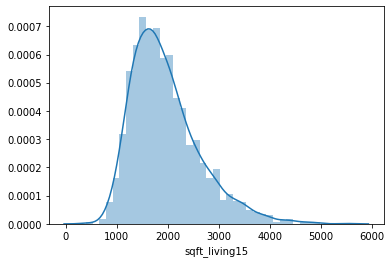

In [100]:
sns.distplot(df['sqft_living15'])
plt.show()

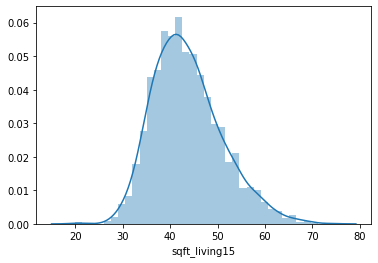

In [102]:
sns.distplot(df['sqft_living15']**(1/2))
plt.show()

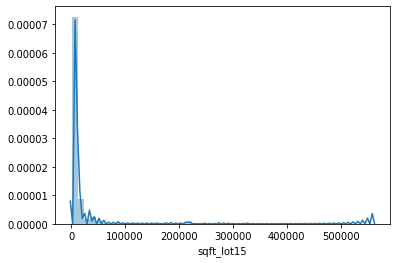

In [103]:
sns.distplot(df['sqft_lot15'])
plt.show()

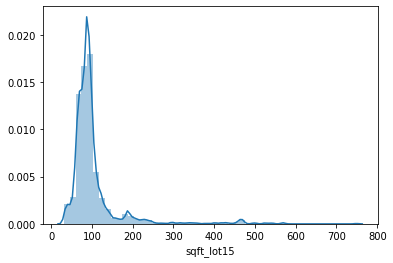

In [105]:
sns.distplot(df['sqft_lot15']**(1/2))
plt.show()

There is no change after transformation also so let us proceed with the main variables only for model building

Date is only categorical variable in the data let us remove it as it is the date on which house was sold out

In [106]:
df2=df.drop('date',axis=1)

In [107]:
df2.head()

id        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2068000270  1183.215957         5        3.0         3850     14990   
1  7732500700   912.414380         4        2.5         3450     35100   
2  7851990240   878.151468         4        3.5         3950     12320   
3  3423049269   474.341649         4        1.5         1950     12559   
4  7852150200   624.459767         3        2.5         1700      6396   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          4      9        2290           1560   
1     2.0           0     0          3     10        3450              0   
2     2.0           0     0          3     10        3950              0   
3     1.5           0     0          3      6        1950              0   
4     2.0           0     0          3      7        1700              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1964             0    98004  47.6425 -122.218           3010   
1      1987             0    98052  47.7302 -122.106           3110   
2      2001             0    98065  47.5414 -121.869           3920   
3      1939             0    98188  47.4364 -122.282           1950   
4      2003             0    98065  47.5333 -121.870           1700   

   sqft_lot15  
0       15001  
1       35894  
2       11086  
3        9178  
4        4444

In [115]:
df2.shape

(2001, 20)

#  Spliting dataset into train and test (70:30) 

In [108]:
X=df2.drop(['price'],axis=1)#independent variables
y=df2['price'] # target variable


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=5)

In [110]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 19)
(601, 19)
(1400,)
(601,)


The data is splitted into 70 percent traning and 30 percent testing and yes this data is representative of over all data 

# Fitting a base model.

In [132]:
X_1=sm.add_constant(X)
X_1.head()

const          id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0    1.0  2068000270         5        3.0         3850     14990     1.0   
1    1.0  7732500700         4        2.5         3450     35100     2.0   
2    1.0  7851990240         4        3.5         3950     12320     2.0   
3    1.0  3423049269         4        1.5         1950     12559     1.5   
4    1.0  7852150200         3        2.5         1700      6396     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          4      9        2290           1560      1964   
1           0     0          3     10        3450              0      1987   
2           0     0          3     10        3950              0      2001   
3           0     0          3      6        1950              0      1939   
4           0     0          3      7        1700              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98004  47.6425 -122.218           3010       15001  
1             0    98052  47.7302 -122.106           3110       35894  
2             0    98065  47.5414 -121.869           3920       11086  
3             0    98188  47.4364 -122.282           1950        9178  
4             0    98065  47.5333 -121.870           1700        4444

In [143]:
model=sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     413.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:12:46   Log-Likelihood:                -11999.
No. Observations:                2001   AIC:                         2.403e+04
Df Residuals:                    1985   BIC:                         2.412e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.603e-09   7.71e-10     -2.079      0.038   -3.12e-09   -9.06e-11
bedrooms         -6.1404      3.101     -1.980      0.048     -12.221      -0.060
bathrooms        29.7415      5.175      5.747      0.000      19.592      39.891
sqft_living       0.0378      0.004     10.445      0.000       0.031       0.045
sqft_lot          0.0001      5e-05      2.276      0.023    1.58e-05       0.000
waterfront      175.7898     32.614      5.390      0.000     111.828     239.752
view             30.5935      3.075      9.949      0.000      24.563      36.624
condition        21.6551      3.495      6.196      0.000      14.801      28.510
grade            61.6495      3.493     17.648      0.000      54.799      68.500
sqft_above        0.0258      0.003      7.532      0.000       0.019       0.033
sqft_basement     0.0120      0.004      3.204      0.001       0.005       0.019
yr_built         -1.4309      0.115    -12.477      0.000      -1.656      -1.206
yr_renovated      0.0228      0.006      3.951      0.000       0.012       0.034
zipcode          -0.3204      0.029    -11.060      0.000      -0.377      -0.264
lat             447.6170     17.559     25.493      0.000     413.182     482.052
long           -105.2547     20.902     -5.036      0.000    -146.246     -64.263
sqft_living15     0.0390      0.005      7.380      0.000       0.029       0.049
==============================================================================
Omnibus:                      296.376   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.858
Skew:                           0.713   Prob(JB):                    9.56e-227
Kurtosis:                       6.233   Cond. No.                     3.05e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.32e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

we got R squared as 0.75 for our base model which is not bad but we did not apply any feature engineering techniques so let us try to do the statistical test's of the feature for the feature selection, we can also use the forward selection and backward elimination , we will use the Variance inflation factor

# prediction using test data. 

In [145]:
y_pred = model1.predict(X_test)
y_pred

51       509.348767
1327     654.432161
1488     767.277006
1432     650.780532
417      510.572490
269      689.508825
191      435.879610
1890     717.250157
1343     648.750108
1792     549.974714
436      552.572809
156      690.333432
1857     961.830829
1468     944.824411
266      899.812625
660      707.279122
1976     916.653153
492      703.908895
1521     436.985773
33       555.219042
1598     695.903039
611      942.804056
1817     522.805847
1591     588.107876
1764     705.102176
1748     773.033573
149      481.150756
668      716.628552
610      582.149367
1113     640.156250
1312     590.614209
1868     676.035890
966      749.244097
783      392.296423
483      948.924883
120      559.269543
1729     698.128597
362      682.695275
619      652.914707
944      544.259008
115      477.460603
1448     489.474136
1271     576.528765
1092     536.587206
222      655.406696
478      423.951383
1447     710.737019
1314     893.895893
1961     856.612483
509      874.175790


# Which variables are significant? 

let us check using the p value

In [122]:
(model.pvalues)>0.05

const             True
id               False
bedrooms          True
bathrooms        False
sqft_living      False
sqft_lot         False
floors            True
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15        True
dtype: bool

bedrooms,floors,sqft_lot15 are the variables which are not required using pvalues as they are above 0.05 let us drop them

using pearson correlation

In [182]:
#Correlation with output variable
cor_target = abs(cor['price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.517750
sqft_living      0.693583
grade            0.675114
sqft_above       0.594260
sqft_living15    0.614607
Name: price, dtype: float64

bathrooms,sqft_living,grade,sqft_above,sqft_living15 are the variables which are highly correlated with the target variable price let us build our base model first and the we will see if we should remove our variables or not

using backward feature elimination

In [126]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']


The final set of variables are 'id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15' 

# Checking for multi-collinearity? 

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

id  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
vif  1.045891  1.657266   3.415475          inf  3.279259  2.051009   

     waterfront      view  condition     grade  sqft_above  sqft_basement  \
vif     1.10933  1.312324   1.214856  3.447528         inf            inf   

     yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
vif  2.531603      1.139249  1.684177  1.226501  1.887889       2.823993   

     sqft_lot15  
vif    3.303653

In [128]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[1.654710580403595,
 3.415327741791622,
 inf,
 3.2728711049795782,
 1.9983968630084499,
 1.1090597884861018,
 1.3015575451562864,
 1.1839072406052777,
 3.413840837419816,
 inf,
 inf,
 2.175542395502096,
 1.134276841628561,
 0.5146551837843429,
 1.2264612671214248,
 1.8578777876625747,
 2.6906526439678844,
 3.301775825629116]

In [129]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [130]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[3.6835921091103505, 1.654710580403595, 3.415327741791622, inf, 3.2728711049795782, 1.9983968630084499, 1.1090597884861018, 1.3015575451562864, 1.1839072406052777, 3.413840837419816, inf, inf, 2.175542395502096, 1.134276841628561, 0.5146551837843429, 1.2264612671214248, 1.8578777876625747, 2.6906526439678844, 3.301775825629116]
Max VIF is for variable no.:
3
Iteration no.
2
[3.6835921091103505, 1.654710580403595, 3.4153277417916246, 3.2728711049795782, 1.9983968630084499, 1.109059788486102, 1.3015575451562864, 1.1839072406052775, 3.4138408374198175, 4.95971124378365, 2.0624492393756486, 2.1755423955021045, 1.1342768416285613, 0.514655183784341, 1.2264612671214254, 1.8578777876625585, 2.6906526439678853, 3.3017758256291168]
Max VIF is for variable no.:
9


In [131]:
## includes only the relevant features.
train_out.head()

id  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
0  2068000270         5        3.0     14990     1.0           0     0   
1  7732500700         4        2.5     35100     2.0           0     0   
2  7851990240         4        3.5     12320     2.0           0     0   
3  3423049269         4        1.5     12559     1.5           0     0   
4  7852150200         3        2.5      6396     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9        2290           1560      1964             0   
1          3     10        3450              0      1987             0   
2          3     10        3950              0      2001             0   
3          3      6        1950              0      1939             0   
4          3      7        1700              0      2003             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98004  47.6425 -122.218           3010       15001  
1    98052  47.7302 -122.106           3110       35894  
2    98065  47.5414 -121.869           3920       11086  
3    98188  47.4364 -122.282           1950        9178  
4    98065  47.5333 -121.870           1700        4444

id	bedrooms	bathrooms	sqft_lot	floors	waterfront	view	condition	grade	sqft_above	sqft_basement	yr_built	yr_renovated	zipcode	lat	long	sqft_living15	sqft_lot15 are the relevant variables using vif

# Backword elmination features

In [134]:
X_1=X_1[['id','bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15']]

In [135]:
X_1.head()

id  bedrooms  bathrooms  sqft_living  sqft_lot  waterfront  view  \
0  2068000270         5        3.0         3850     14990           0     0   
1  7732500700         4        2.5         3450     35100           0     0   
2  7851990240         4        3.5         3950     12320           0     0   
3  3423049269         4        1.5         1950     12559           0     0   
4  7852150200         3        2.5         1700      6396           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9        2290           1560      1964             0   
1          3     10        3450              0      1987             0   
2          3     10        3950              0      2001             0   
3          3      6        1950              0      1939             0   
4          3      7        1700              0      2003             0   

   zipcode      lat     long  sqft_living15  
0    98004  47.6425 -122.218           3010  
1    98052  47.7302 -122.106           3110  
2    98065  47.5414 -121.869           3920  
3    98188  47.4364 -122.282           1950  
4    98065  47.5333 -121.870           1700

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_1,y,test_size=0.3,random_state=5)

In [138]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1400, 17), (601, 17), (1400,), (601,))

In [139]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
print('coefficient = ',lin_reg.coef_)
print('intercept = ',lin_reg.intercept_)
print('R^2 training  = ',lin_reg.score(x_train,y_train))
print(f'R^2 score for test:{lin_reg.score(x_test,y_test)}')

coefficient =  [-6.95352137e-10 -5.78138560e+00  3.26483292e+01  3.99232268e-02
  1.45274702e-04  5.02918058e+01  3.65232374e+01  2.24538162e+01
  6.11784694e+01  2.59248293e-02  1.39983975e-02 -1.42479407e+00
  2.14419075e-02 -3.00965529e-01  4.35309357e+02 -1.00872934e+02
  3.58952019e-02]
intercept =  -807.8150063827336
R^2 training  =  0.7680123243434869
R^2 score for test:0.7261789037296867


In [141]:
model2=sm.OLS(y_train,x_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:09:12   Log-Likelihood:                -8347.2
No. Observations:                1400   AIC:                         1.673e+04
Df Residuals:                    1384   BIC:                         1.681e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -7.005e-10   8.97e-10     -0.781      0.435   -2.46e-09    1.06e-09
bedrooms         -5.8167      3.558     -1.635      0.102     -12.796       1.162
bathrooms        32.7088      6.005      5.447      0.000      20.928      44.489
sqft_living       0.0400      0.004      8.906      0.000       0.031       0.049
sqft_lot          0.0001   5.49e-05      2.625      0.009    3.64e-05       0.000
waterfront       50.6484     49.358      1.026      0.305     -46.176     147.473
view             36.5781      3.632     10.070      0.000      29.453      43.704
condition        22.3512      4.026      5.551      0.000      14.453      30.250
grade            61.2294      4.056     15.095      0.000      53.273      69.186
sqft_above        0.0259      0.004      6.448      0.000       0.018       0.034
sqft_basement     0.0140      0.004      3.176      0.002       0.005       0.023
yr_built         -1.4324      0.132    -10.815      0.000      -1.692      -1.173
yr_renovated      0.0214      0.007      3.279      0.001       0.009       0.034
zipcode          -0.3086      0.035     -8.913      0.000      -0.377      -0.241
lat             435.3954     20.482     21.257      0.000     395.216     475.575
long           -100.5148     25.083     -4.007      0.000    -149.719     -51.310
sqft_living15     0.0356      0.006      5.601      0.000       0.023       0.048
==============================================================================
Omnibus:                      152.957   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.171
Skew:                           0.627   Prob(JB):                     1.38e-79
Kurtosis:                       5.157   Cond. No.                     3.18e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

we see that our R squared has increased to 0.768 after removing the unwanted features now let us not stop here and try building other models

In [142]:
y_pred = model2.predict(x_test)
y_pred

51       509.348767
1327     654.432161
1488     767.277006
1432     650.780532
417      510.572490
269      689.508825
191      435.879610
1890     717.250157
1343     648.750108
1792     549.974714
436      552.572809
156      690.333432
1857     961.830829
1468     944.824411
266      899.812625
660      707.279122
1976     916.653153
492      703.908895
1521     436.985773
33       555.219042
1598     695.903039
611      942.804056
1817     522.805847
1591     588.107876
1764     705.102176
1748     773.033573
149      481.150756
668      716.628552
610      582.149367
1113     640.156250
1312     590.614209
1868     676.035890
966      749.244097
783      392.296423
483      948.924883
120      559.269543
1729     698.128597
362      682.695275
619      652.914707
944      544.259008
115      477.460603
1448     489.474136
1271     576.528765
1092     536.587206
222      655.406696
478      423.951383
1447     710.737019
1314     893.895893
1961     856.612483
509      874.175790


In [147]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

106.25340076298778

# Decision Tree

In [148]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()

In [149]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [150]:
print('R^2 training  = ',dt.score(x_train,y_train))
print(f'R^2 score for test:{dt.score(x_test,y_test)}')

R^2 training  =  0.9971364923049797
R^2 score for test:0.6508742681596742


In [153]:
Mdt=sm.OLS(y_train,x_train).fit()
Mdt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     305.4
Date:                Mon, 09 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:17:43   Log-Likelihood:                -8347.2
No. Observations:                1400   AIC:                         1.673e+04
Df Residuals:                    1384   BIC:                         1.681e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -7.005e-10   8.97e-10     -0.781      0.435   -2.46e-09    1.06e-09
bedrooms         -5.8167      3.558     -1.635      0.102     -12.796       1.162
bathrooms        32.7088      6.005      5.447      0.000      20.928      44.489
sqft_living       0.0400      0.004      8.906      0.000       0.031       0.049
sqft_lot          0.0001   5.49e-05      2.625      0.009    3.64e-05       0.000
waterfront       50.6484     49.358      1.026      0.305     -46.176     147.473
view             36.5781      3.632     10.070      0.000      29.453      43.704
condition        22.3512      4.026      5.551      0.000      14.453      30.250
grade            61.2294      4.056     15.095      0.000      53.273      69.186
sqft_above        0.0259      0.004      6.448      0.000       0.018       0.034
sqft_basement     0.0140      0.004      3.176      0.002       0.005       0.023
yr_built         -1.4324      0.132    -10.815      0.000      -1.692      -1.173
yr_renovated      0.0214      0.007      3.279      0.001       0.009       0.034
zipcode          -0.3086      0.035     -8.913      0.000      -0.377      -0.241
lat             435.3954     20.482     21.257      0.000     395.216     475.575
long           -100.5148     25.083     -4.007      0.000    -149.719     -51.310
sqft_living15     0.0356      0.006      5.601      0.000       0.023       0.048
==============================================================================
Omnibus:                      152.957   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.171
Skew:                           0.627   Prob(JB):                     1.38e-79
Kurtosis:                       5.157   Cond. No.                     3.18e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

here the model is overfitting

In [152]:
y_pred =Mdt.predict(x_test)
y_pred

51       509.348767
1327     654.432161
1488     767.277006
1432     650.780532
417      510.572490
269      689.508825
191      435.879610
1890     717.250157
1343     648.750108
1792     549.974714
436      552.572809
156      690.333432
1857     961.830829
1468     944.824411
266      899.812625
660      707.279122
1976     916.653153
492      703.908895
1521     436.985773
33       555.219042
1598     695.903039
611      942.804056
1817     522.805847
1591     588.107876
1764     705.102176
1748     773.033573
149      481.150756
668      716.628552
610      582.149367
1113     640.156250
1312     590.614209
1868     676.035890
966      749.244097
783      392.296423
483      948.924883
120      559.269543
1729     698.128597
362      682.695275
619      652.914707
944      544.259008
115      477.460603
1448     489.474136
1271     576.528765
1092     536.587206
222      655.406696
478      423.951383
1447     710.737019
1314     893.895893
1961     856.612483
509      874.175790


# ExtraTreeRegressor

In [154]:
from sklearn.tree import ExtraTreeRegressor

In [155]:
et = ExtraTreeRegressor()

In [156]:
et.fit(x_train,y_train)

ExtraTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                   max_leaf_nodes=None, min_impurity_decrease=0.0,
                   min_impurity_split=None, min_samples_leaf=1,
                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                   random_state=None, splitter='random')

In [157]:
y_pred_et = et.predict(x_test)

In [158]:
np.sqrt(mean_squared_error(y_pred_et,y_test))

146.48082792467645

In [159]:
print('R^2 training  = ',et.score(x_train,y_train))
print(f'R^2 score for test:{et.score(x_test,y_test)}')

R^2 training  =  0.9971364923049797
R^2 score for test:0.4795695149647903


Here also model is overfitting

# Ensemble methods

In [161]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Ada Boost Regressor

In [162]:
abr = AdaBoostRegressor()

In [163]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [164]:
y_pred_abr = abr.predict(x_test)

In [165]:
np.sqrt(mean_squared_error(y_pred_abr,y_test))

108.43698492094357

In [166]:
print('R^2 training  = ',abr.score(x_train,y_train))
print(f'R^2 score for test:{abr.score(x_test,y_test)}')

R^2 training  =  0.7988107782875089
R^2 score for test:0.7147957300501809


# Bagging Regressor

In [167]:
bg = BaggingRegressor()

In [168]:
bg.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [169]:
y_pred_bg = bg.predict(x_test)

In [170]:
np.sqrt(mean_squared_error(y_pred_bg,y_test))

91.37129069514967

In [171]:
print('R^2 training  = ',bg.score(x_train,y_train))
print(f'R^2 score for test:{bg.score(x_test,y_test)}')

R^2 training  =  0.9641762705337134
R^2 score for test:0.7975020291837494


# GradientBoostingRegressor

In [172]:
gbr = GradientBoostingRegressor()

In [173]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [174]:
y_pred_gbr = gbr.predict(x_test)

In [175]:
np.sqrt(mean_squared_error(y_pred_gbr,y_test))

87.57653416349433

In [176]:
print('R^2 training  = ',gbr.score(x_train,y_train))
print(f'R^2 score for test:{gbr.score(x_test,y_test)}')

R^2 training  =  0.9302118997818438
R^2 score for test:0.8139727079534913


# XG Boost Regressor

In [184]:
from xgboost import XGBRegressor,XGBClassifier

In [186]:
best_xgb_model = XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)  
best_xgb_model.fit(x_train,y_train)

[13:41:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [188]:
y_predxgb = best_xgb_model.predict(x_test)

In [189]:
np.sqrt(mean_squared_error(y_predxgb,y_test))

81.5771955287458

In [190]:
print('R^2 training  = ',gbr.score(x_train,y_train))
print(f'R^2 score for test:{gbr.score(x_test,y_test)}')

R^2 training  =  0.9302118997818438
R^2 score for test:0.8139727079534913


# Random Forest Regressor

In [177]:
rf = RandomForestRegressor()

In [178]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [179]:
y_pred_rf = rf.predict(x_test)

In [180]:
np.sqrt(mean_squared_error(y_pred_rf,y_test))

87.06523385601342

In [181]:
print('R^2 training  = ',rf.score(x_train,y_train))
print(f'R^2 score for test:{rf.score(x_test,y_test)}')

R^2 training  =  0.9614282881024233
R^2 score for test:0.8161385427629559


RMSE is less here with 87.06523385601342 so it is the better performed model till now


XG Boost Regressor gave less RMSE compared to all the models and it is performing well in the training and testing data 

In [183]:
#Correlation with output variable
cor_target = abs(cor['price'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.517750
sqft_living      0.693583
grade            0.675114
sqft_above       0.594260
sqft_living15    0.614607
Name: price, dtype: float64

bathrooms,sqft_living,grade,sqft_living,grade,sqft_above,sqft_living15 are the variables which are highly correlated with the target variable price

#  What changes from the base model had the most effect on model performance? 

After performing the base model using linear regression we see that we have got the the rsquare as 0.75 and after that we did feature selection and we have dropped the features in which we got p value greater than 0.05 in the OLS summary and then we built the linear regression model and we found that rsquare increased to 0.76 and then we have built more regression models which are decission tree,extra tree, random forest,ensemble techinques,XGBoost out of all we see that XGBoost is giving us less RMSE(81) and its accuracy is better compared to all the models so we can go ahead and use XGBoost regressor for this data set and deploy it   

# key risks to results and interpretation? 

The key risks for this data set is it is not normally distributed and there are lot of outliers as this data set consists of all dimensions of the houses i have not removed any outlier as these are important and the data consists of different sqft and price and built this model with the orginal data There fore the dimensions of the house bathrooms,sqft_living,grade,sqft_living,grade,sqft_above,sqft_living15 are positively correlated with price so changes in these will reflect price also